Деревья решений — это популярный алгоритм машинного обучения, используемый для задач классификации и регрессии. Они представляют собой иерархическую структуру, в которой данные разделяются на группы на основе условий, заданных на каждом узле дерева. Конечные узлы, или листья, представляют предсказания модели.

In [1]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

print('The scikit-learn version is {}.'.format(sklearn.__version__))

pd.options.display.max_rows = None

The scikit-learn version is 1.3.2.


In [2]:
df = pd.read_csv("titanic.csv")

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
median_age=df.Age.median()
median_age

28.0

In [5]:
df.Age.fillna(median_age, inplace = True)
df.drop('Cabin', axis = 1,inplace = True)
df.Embarked=df.Embarked.fillna(df['Embarked'].mode()[0])
df['Fare']=df['Fare'].replace(0, df['Fare'].median())
df['FamilySize'] = df['SibSp'] + df['Parch']+1
df['GenderClass'] = df.apply(lambda x: 'child' if x['Age'] < 15 else x['Sex'],axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,GenderClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,S,2,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C,2,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,S,1,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,S,2,female
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,S,1,male
5,6,0,3,"Moran, Mr. James",male,28.00,0,0,330877,8.4583,Q,1,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,S,1,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,S,5,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,S,3,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,C,2,child


In [6]:
df=pd.get_dummies(df,columns=['GenderClass','Embarked'],drop_first=True)
df=df.drop(['Name','Ticket','Sex','SibSp','Parch'],axis=1)
df

,PassengerId,Survived,Pclass,Age,Fare,FamilySize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
0,1,0,3,22.00,7.2500,2,False,True,False,True
1,2,1,1,38.00,71.2833,2,True,False,False,False
2,3,1,3,26.00,7.9250,1,True,False,False,True
3,4,1,1,35.00,53.1000,2,True,False,False,True
4,5,0,3,35.00,8.0500,1,False,True,False,True
5,6,0,3,28.00,8.4583,1,False,True,True,False
6,7,0,1,54.00,51.8625,1,False,True,False,True
7,8,0,3,2.00,21.0750,5,False,False,False,True
8,9,1,3,27.00,11.1333,3,True,False,False,True
9,10,1,2,14.00,30.0708,2,False,False,False,False


In [7]:
X = df.dropna()
y = X.pop('Survived')

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         891 non-null    int64  
 1   Pclass              891 non-null    int64  
 2   Age                 891 non-null    float64
 3   Fare                891 non-null    float64
 4   FamilySize          891 non-null    int64  
 5   GenderClass_female  891 non-null    bool   
 6   GenderClass_male    891 non-null    bool   
 7   Embarked_Q          891 non-null    bool   
 8   Embarked_S          891 non-null    bool   
dtypes: bool(4), float64(2), int64(3)
memory usage: 38.4 KB


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

model = DecisionTreeClassifier(random_state=0)
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score
print('Accuracy score for the test data is:',accuracy_score(y_test,y_pred))

Accuracy score for the test data is: 0.776536312849162


              precision    recall  f1-score   support

           0       0.80      0.83      0.81       106
           1       0.74      0.70      0.72        73

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.78       179



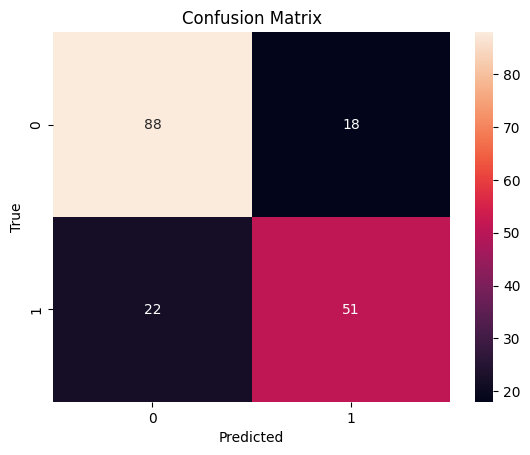

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, y_pred))